### Apriori On Market Basket Analysis

#### Loading Packages

In [170]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder

### Loading Data

In [171]:
df = pd.read_csv("Market_Basket_Optimisation.csv",header = None)
df.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,whole wheat pasta,french fries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,soup,light cream,shallot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,frozen vegetables,spaghetti,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,french fries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [172]:
df.shape

(7501, 20)

In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7501 entries, 0 to 7500
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       7501 non-null   object
 1   1       5747 non-null   object
 2   2       4389 non-null   object
 3   3       3345 non-null   object
 4   4       2529 non-null   object
 5   5       1864 non-null   object
 6   6       1369 non-null   object
 7   7       981 non-null    object
 8   8       654 non-null    object
 9   9       395 non-null    object
 10  10      256 non-null    object
 11  11      154 non-null    object
 12  12      87 non-null     object
 13  13      47 non-null     object
 14  14      25 non-null     object
 15  15      8 non-null      object
 16  16      4 non-null      object
 17  17      4 non-null      object
 18  18      3 non-null      object
 19  19      1 non-null      object
dtypes: object(20)
memory usage: 1.1+ MB


In [174]:
df.dtypes

0     object
1     object
2     object
3     object
4     object
5     object
6     object
7     object
8     object
9     object
10    object
11    object
12    object
13    object
14    object
15    object
16    object
17    object
18    object
19    object
dtype: object

In [175]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,7501,5747,4389,3345,2529,1864,1369,981,654,395,256,154,87,47,25,8,4,4,3,1
unique,115,117,115,114,110,106,102,98,88,80,66,50,43,28,19,8,3,3,3,1
top,mineral water,mineral water,mineral water,mineral water,green tea,french fries,green tea,green tea,green tea,green tea,low fat yogurt,green tea,green tea,green tea,magazines,salmon,frozen smoothie,protein bar,spinach,olive oil
freq,577,484,375,201,153,107,96,67,57,31,22,15,8,4,3,1,2,2,1,1


In [176]:
df.nunique()

0     115
1     117
2     115
3     114
4     110
5     106
6     102
7      98
8      88
9      80
10     66
11     50
12     43
13     28
14     19
15      8
16      3
17      3
18      3
19      1
dtype: int64

In [197]:
df.isnull().sum()

0        0
1     1754
2     3112
3     4156
4     4972
5     5637
6     6132
7     6520
8     6847
9     7106
10    7245
11    7347
12    7414
13    7454
14    7476
15    7493
16    7497
17    7497
18    7498
19    7500
dtype: int64

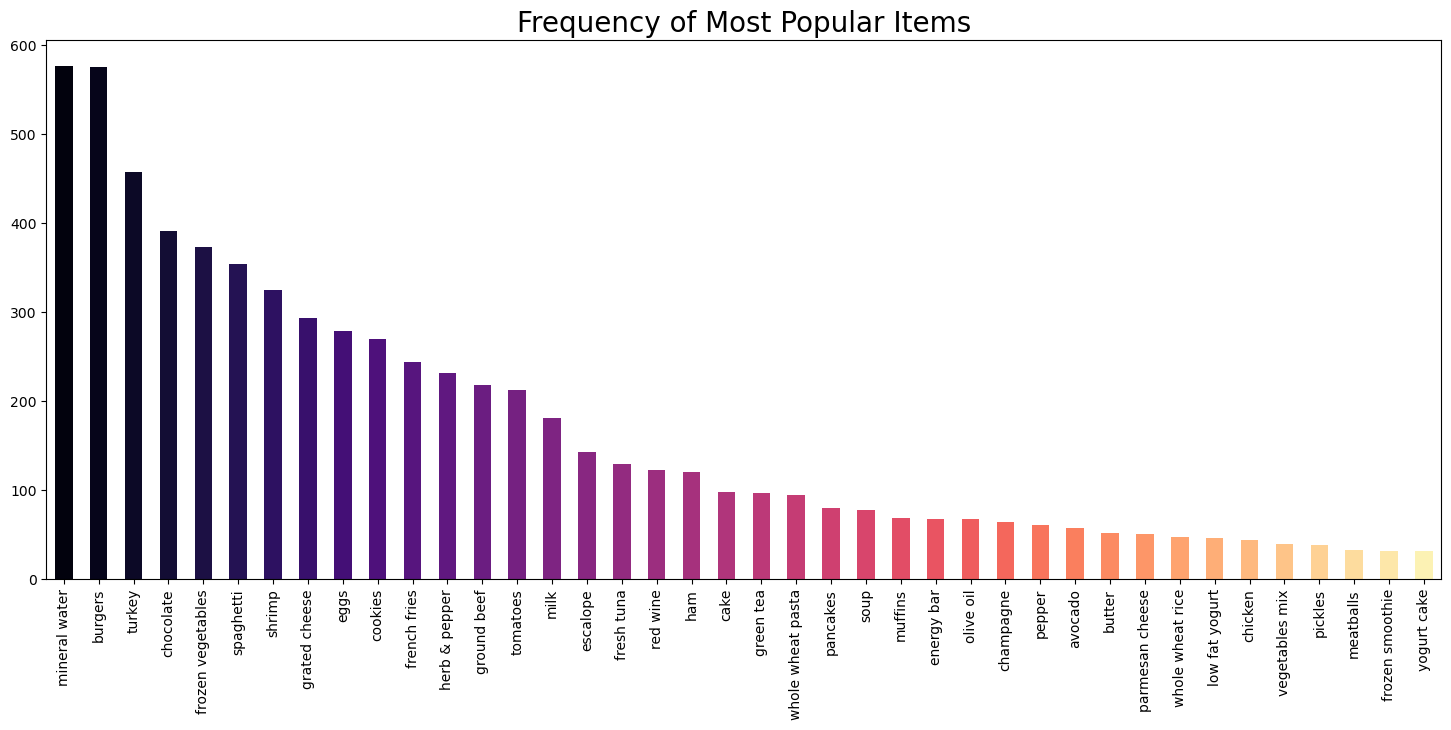

In [178]:
plt.figure(figsize=(18, 7))
color = sns.color_palette('magma', n_colors=40)
df[0].value_counts().head(40).plot.bar(color=color)
plt.title('Frequency of Most Popular Items', fontsize=20)
plt.xticks(rotation=90)
plt.show()

In [179]:
# making each customers shopping items an identical list
trans = []
for i in range(0, 7501):
    trans.append([str(df.values[i,j]) for j in range(0, 20)])

# conveting it into an numpy array
trans = np.array(trans)

# checking the shape of the array
print(trans.shape)

(7501, 20)


In [180]:
trans

array([['shrimp', 'almonds', 'avocado', ..., 'frozen smoothie',
        'spinach', 'olive oil'],
       ['burgers', 'meatballs', 'eggs', ..., 'nan', 'nan', 'nan'],
       ['chutney', 'nan', 'nan', ..., 'nan', 'nan', 'nan'],
       ...,
       ['chicken', 'nan', 'nan', ..., 'nan', 'nan', 'nan'],
       ['escalope', 'green tea', 'nan', ..., 'nan', 'nan', 'nan'],
       ['eggs', 'frozen smoothie', 'yogurt cake', ..., 'nan', 'nan',
        'nan']], dtype='<U20')

#### Using Transaction One hot Encoder

In [181]:
te = TransactionEncoder()
data = te.fit_transform(trans)
data = pd.DataFrame(data, columns = te.columns_)
# getting the shape of the data
data.shape

(7501, 121)

In [189]:
data = data.loc[:, ['mineral water', 'burgers', 'turkey', 'chocolate', 'frozen vegetables', 'spaghetti',
                    'shrimp', 'grated cheese', 'eggs', 'cookies', 'french fries', 'herb & pepper', 'ground beef',
                    'tomatoes', 'milk', 'escalope', 'fresh tuna', 'red wine', 'ham', 'cake', 'green tea',
                    'whole wheat pasta', 'pancakes', 'soup', 'muffins', 'energy bar', 'olive oil', 'champagne', 
                    'avocado', 'pepper', 'butter', 'parmesan cheese', 'whole wheat rice', 'low fat yogurt', 
                    'chicken', 'vegetables mix', 'pickles', 'meatballs', 'frozen smoothie', 'yogurt cake']]

In [190]:
data

,mineral water,burgers,turkey,chocolate,frozen vegetables,spaghetti,shrimp,grated cheese,eggs,cookies,...,butter,parmesan cheese,whole wheat rice,low fat yogurt,chicken,vegetables mix,pickles,meatballs,frozen smoothie,yogurt cake
0,True,False,False,False,False,False,True,False,False,False,...,False,False,False,True,False,True,False,False,True,False
1,False,True,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
7497,False,True,False,False,True,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
7498,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
7499,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [191]:
# returning items and itemsets with at least 5% support
support = apriori(data, min_support = 0.005, use_colnames = True)
support

,support,itemsets
0,0.238368,(mineral water)
1,0.087188,(burgers)
2,0.062525,(turkey)
3,0.163845,(chocolate)
4,0.095321,(frozen vegetables)
...,...,...
521,0.005599,"(milk, frozen smoothie, spaghetti)"
522,0.005066,"(olive oil, spaghetti, pancakes)"
523,0.007199,"(milk, french fries, eggs)"
524,0.007066,"(green tea, french fries, eggs)"


In [192]:
frequent_itemsets = apriori(data, min_support = 0.005, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.238368,(mineral water),1
1,0.087188,(burgers),1
2,0.062525,(turkey),1
3,0.163845,(chocolate),1
4,0.095321,(frozen vegetables),1
...,...,...,...
521,0.005599,"(milk, frozen smoothie, spaghetti)",3
522,0.005066,"(olive oil, spaghetti, pancakes)",3
523,0.007199,"(milk, french fries, eggs)",3
524,0.007066,"(green tea, french fries, eggs)",3


In [193]:
# getting the item sets with length = 3 and support more han 10%

frequent_itemsets[ (frequent_itemsets['length'] == 3) & (frequent_itemsets['support'] >= 0.01) ]

,support,itemsets,length
367,0.015865,"(mineral water, spaghetti, chocolate)",3
369,0.013465,"(mineral water, chocolate, eggs)",3
371,0.010932,"(mineral water, ground beef, chocolate)",3
373,0.013998,"(milk, mineral water, chocolate)",3
383,0.011998,"(mineral water, spaghetti, frozen vegetables)",3
389,0.011065,"(milk, mineral water, frozen vegetables)",3
395,0.014265,"(mineral water, spaghetti, eggs)",3
396,0.010132,"(mineral water, spaghetti, french fries)",3
398,0.017064,"(mineral water, spaghetti, ground beef)",3
400,0.015731,"(milk, mineral water, spaghetti)",3


#### Finding association rules with corresponding support, confidence and lift.

In [194]:
rules = association_rules(support, metric="lift", min_threshold=1)
rules.tail(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
1546,"(french fries, eggs)",(green tea),0.036395,0.132116,0.007066,0.194139,1.469463,0.002257,1.076965,0.331546
1547,(green tea),"(french fries, eggs)",0.132116,0.036395,0.007066,0.053481,1.469463,0.002257,1.018052,0.368113
1548,(french fries),"(green tea, eggs)",0.170911,0.025463,0.007066,0.041342,1.623580,0.002714,1.016563,0.463252
1549,(eggs),"(green tea, french fries)",0.179709,0.028530,0.007066,0.039318,1.378134,0.001939,1.011229,0.334492
1550,"(milk, ground beef)",(eggs),0.021997,0.179709,0.005866,0.266667,1.483877,0.001913,1.118578,0.333424
1551,"(milk, eggs)",(ground beef),0.030796,0.098254,0.005866,0.190476,1.938619,0.002840,1.113922,0.499553
1552,"(ground beef, eggs)",(milk),0.019997,0.129583,0.005866,0.293333,2.263676,0.003275,1.231723,0.569632
1553,(milk),"(ground beef, eggs)",0.129583,0.019997,0.005866,0.045267,2.263676,0.003275,1.026468,0.641348
1554,(ground beef),"(milk, eggs)",0.098254,0.030796,0.005866,0.059701,1.938619,0.002840,1.030741,0.536923
1555,(eggs),"(milk, ground beef)",0.179709,0.021997,0.005866,0.032641,1.483877,0.001913,1.011003,0.397530


- We filter rules to check lift and confidence. This part of the analysis is where the domain knowledge will come in handy.

In [195]:
rules[(rules['lift'] >= 1) & (rules['confidence'] >= 0.2)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(burgers),(mineral water),0.087188,0.238368,0.024397,0.279817,1.173883,0.003614,1.057552,0.162275
3,(turkey),(mineral water),0.062525,0.238368,0.019197,0.307036,1.288075,0.004293,1.099093,0.238564
4,(mineral water),(chocolate),0.238368,0.163845,0.052660,0.220917,1.348332,0.013604,1.073256,0.339197
5,(chocolate),(mineral water),0.163845,0.238368,0.052660,0.321400,1.348332,0.013604,1.122357,0.308965
7,(frozen vegetables),(mineral water),0.095321,0.238368,0.035729,0.374825,1.572463,0.013007,1.218270,0.402413
...,...,...,...,...,...,...,...,...,...,...
1539,"(milk, eggs)",(french fries),0.030796,0.170911,0.007199,0.233766,1.367770,0.001936,1.082032,0.277426
1544,"(green tea, french fries)",(eggs),0.028530,0.179709,0.007066,0.247664,1.378134,0.001939,1.090324,0.282439
1545,"(green tea, eggs)",(french fries),0.025463,0.170911,0.007066,0.277487,1.623580,0.002714,1.147508,0.394112
1550,"(milk, ground beef)",(eggs),0.021997,0.179709,0.005866,0.266667,1.483877,0.001913,1.118578,0.333424


#### Conclusion
- In looking at the association rules, it seems that the mineral water is brought together with burger and turkey more often. Also we can observe that the transaction for mineral water is higher and is brought by most of the customers together with other items. 